In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings as wr
wr.filterwarnings("ignore")


In [2]:
iris =load_iris ()

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
print(f"Dataset shape: {df.shape}")
print("\nFeature names:")
print(iris.feature_names)
print("\nTarget names:")
print(iris.target_names)

df.columns

Dataset shape: (150, 4)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
['setosa' 'versicolor' 'virginica']


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [8]:
df.shape

(150, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

In [12]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


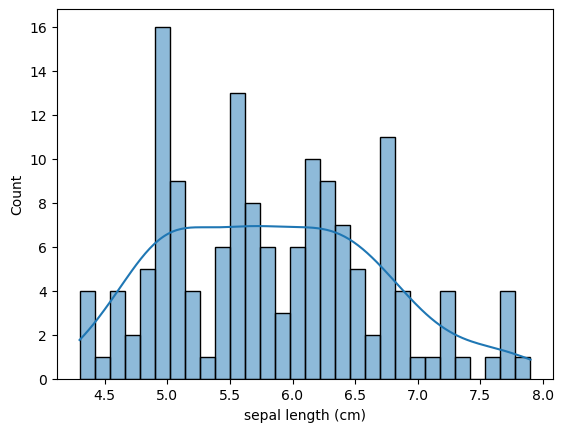

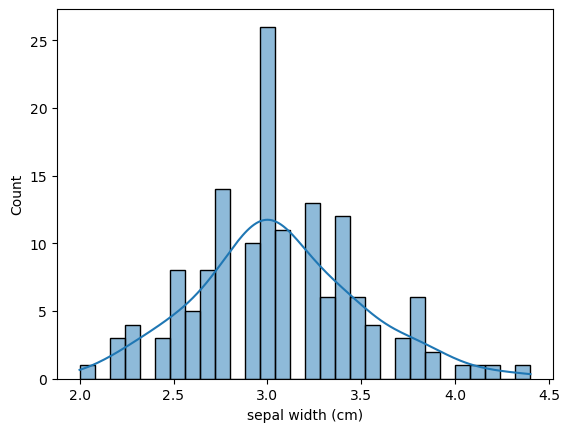

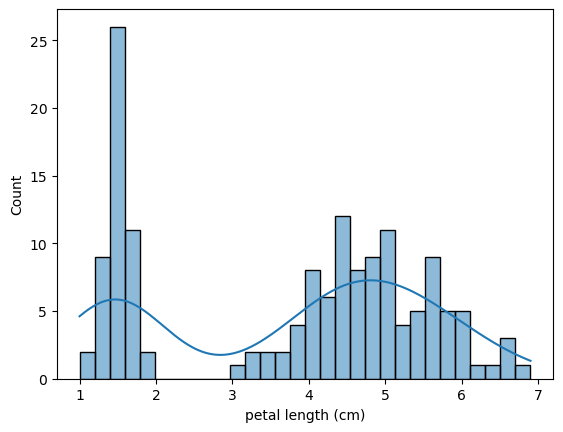

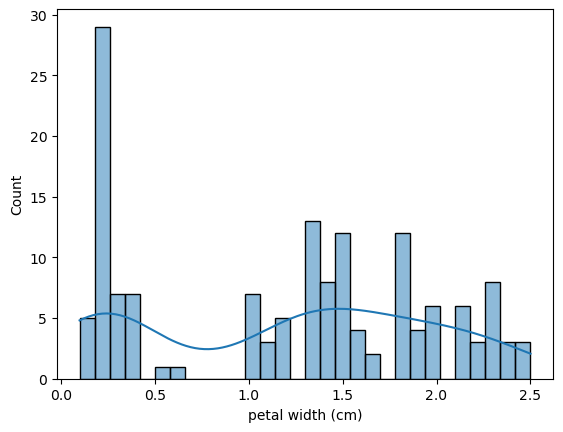

In [17]:
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

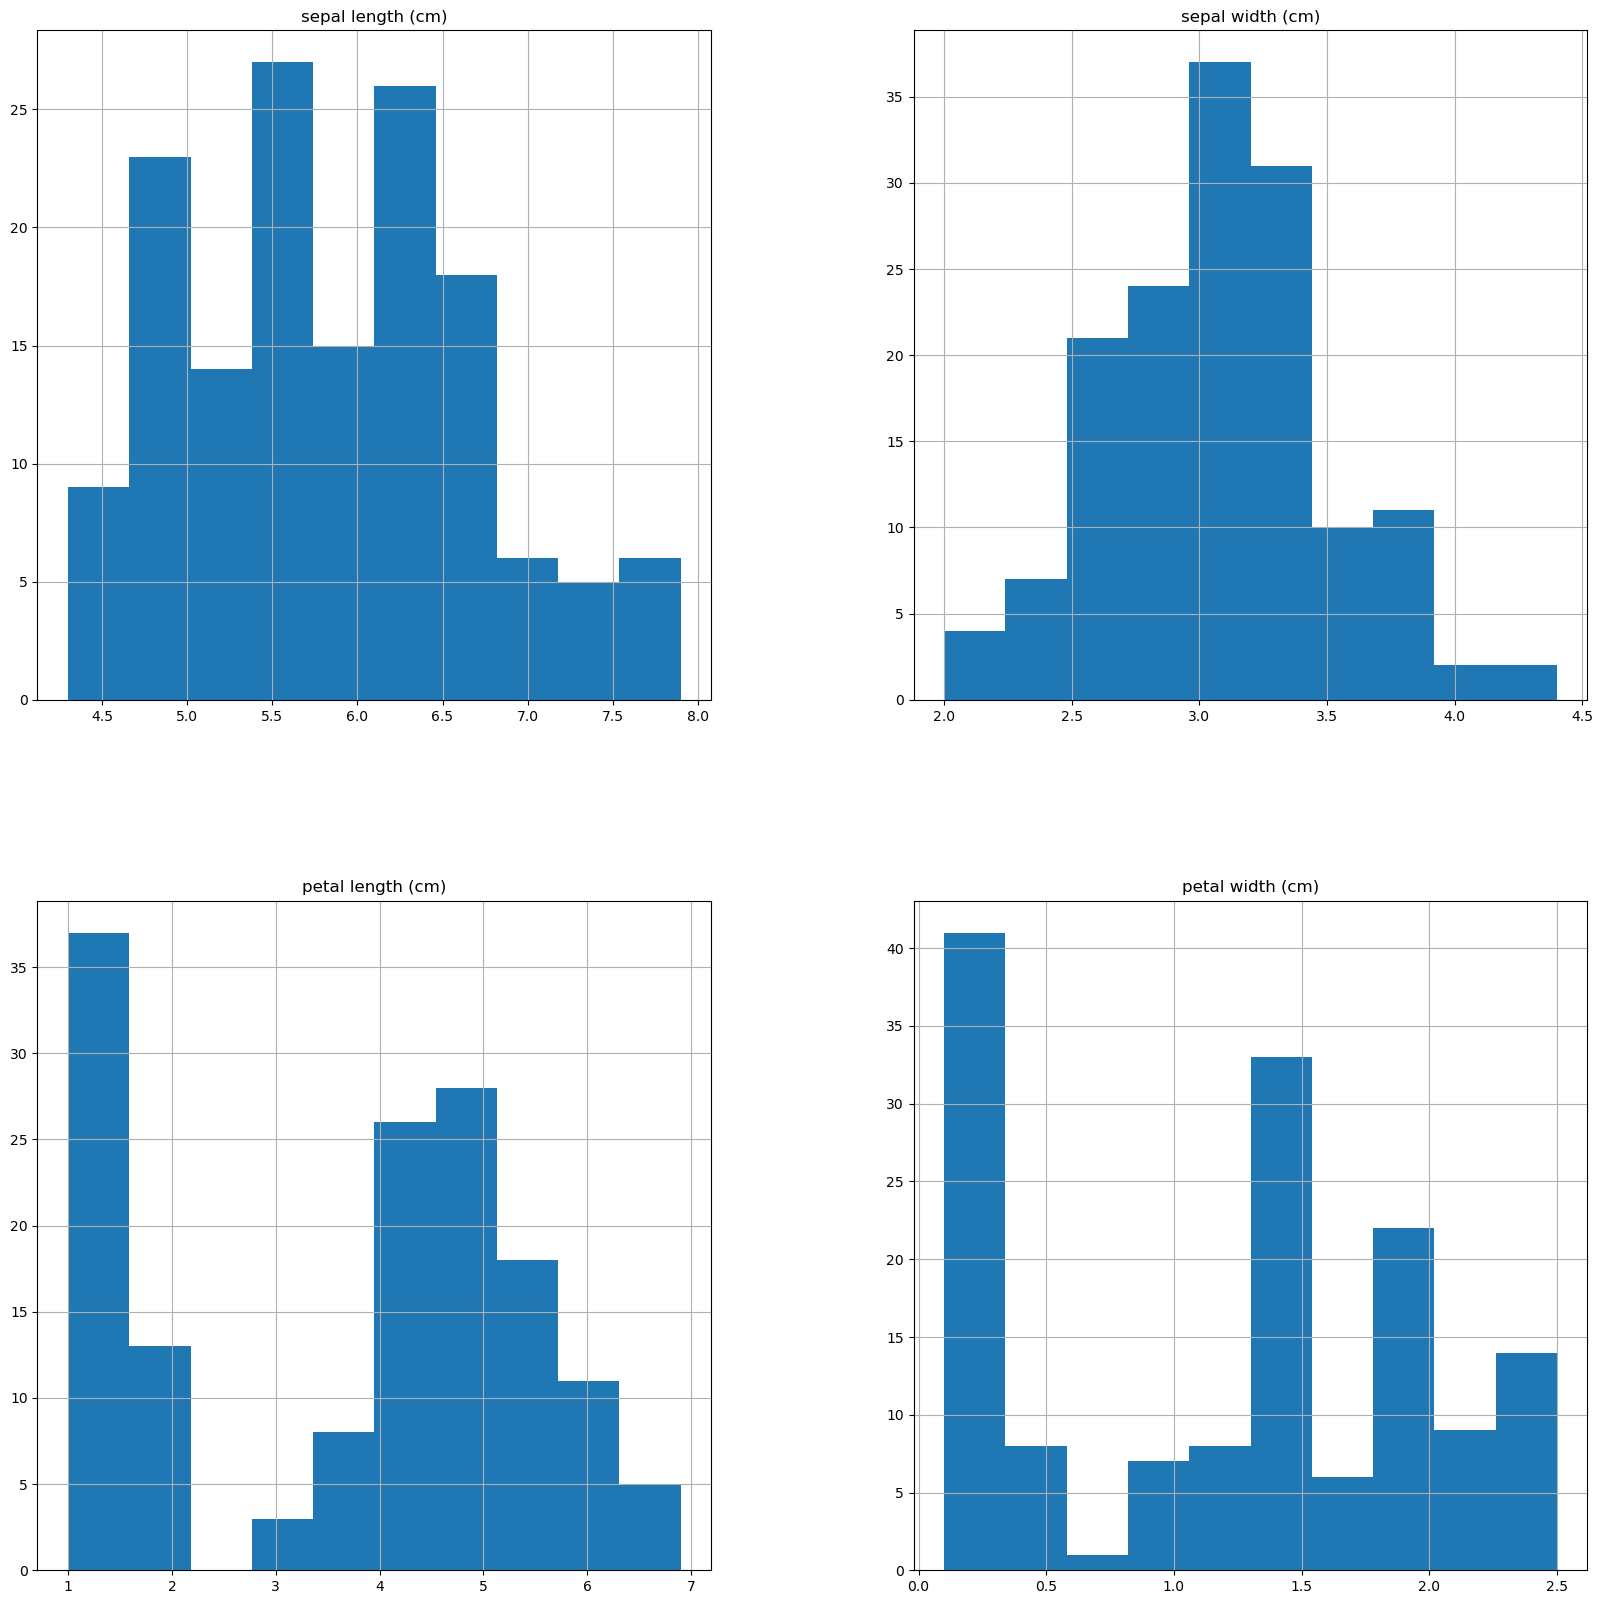

In [18]:
df.hist(figsize = (20,20))

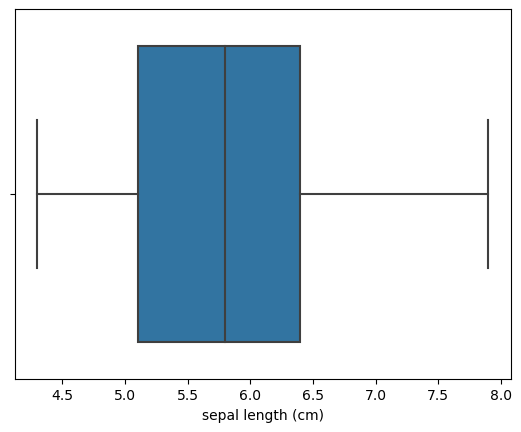

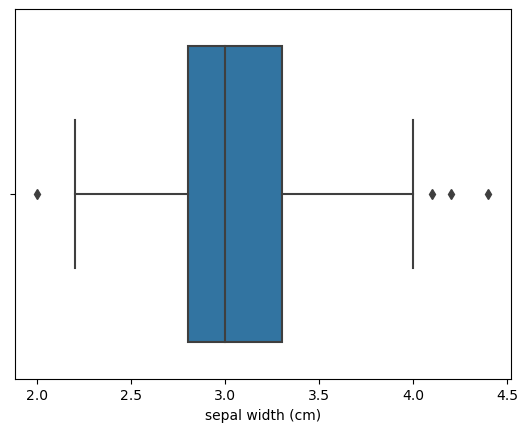

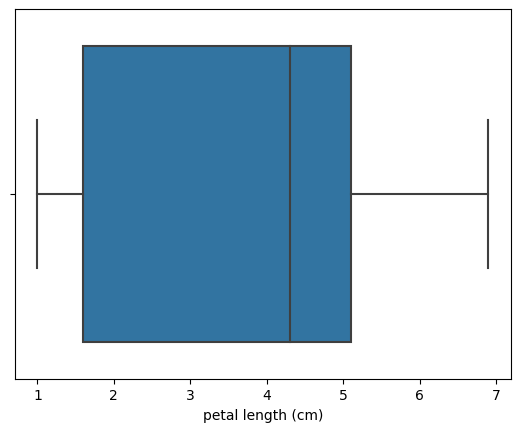

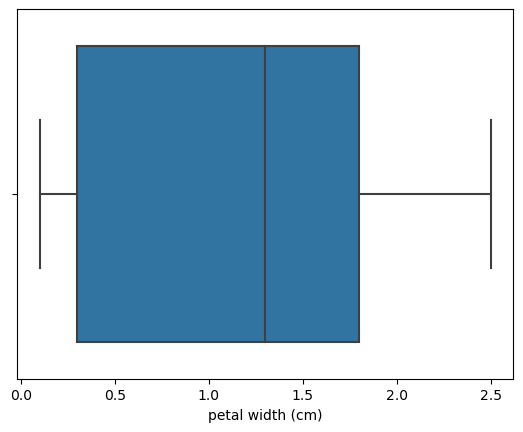

In [19]:
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

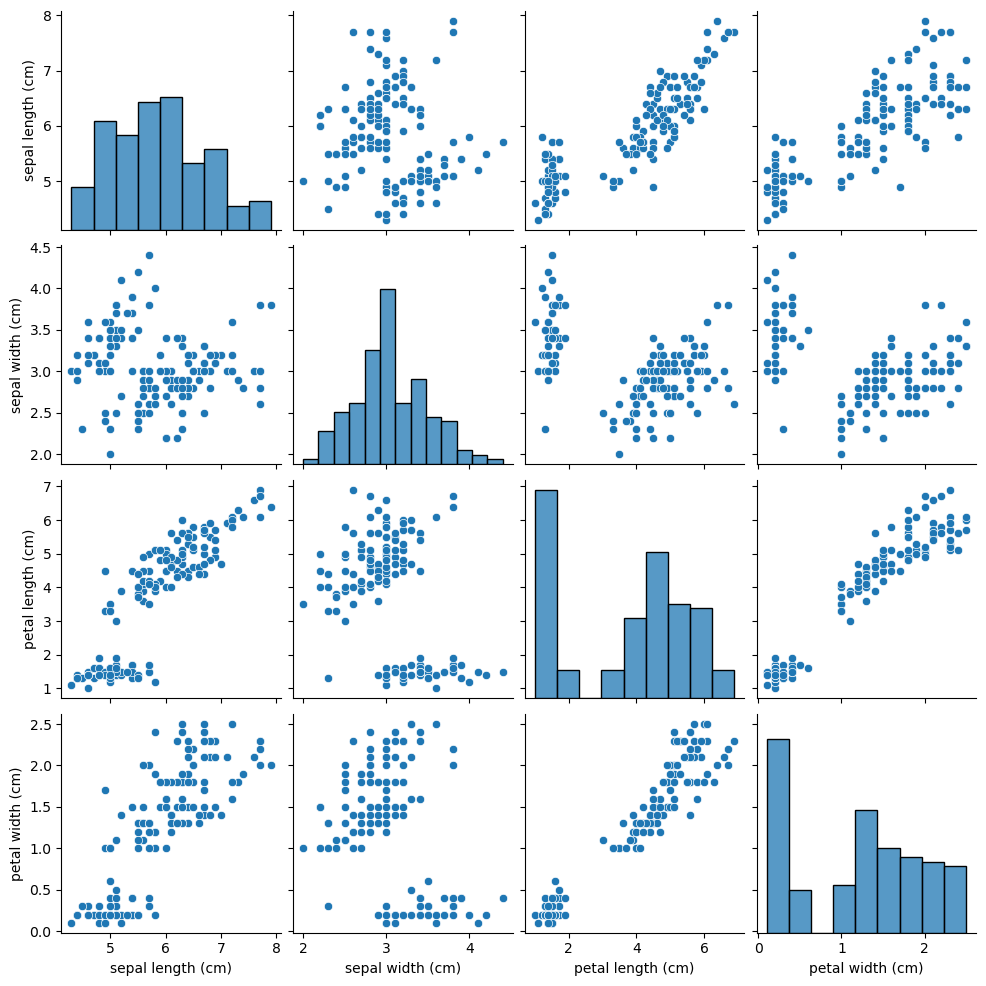

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
df.select_dtypes(include="number").columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [22]:
s=df.select_dtypes(include='number').corr()
s


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


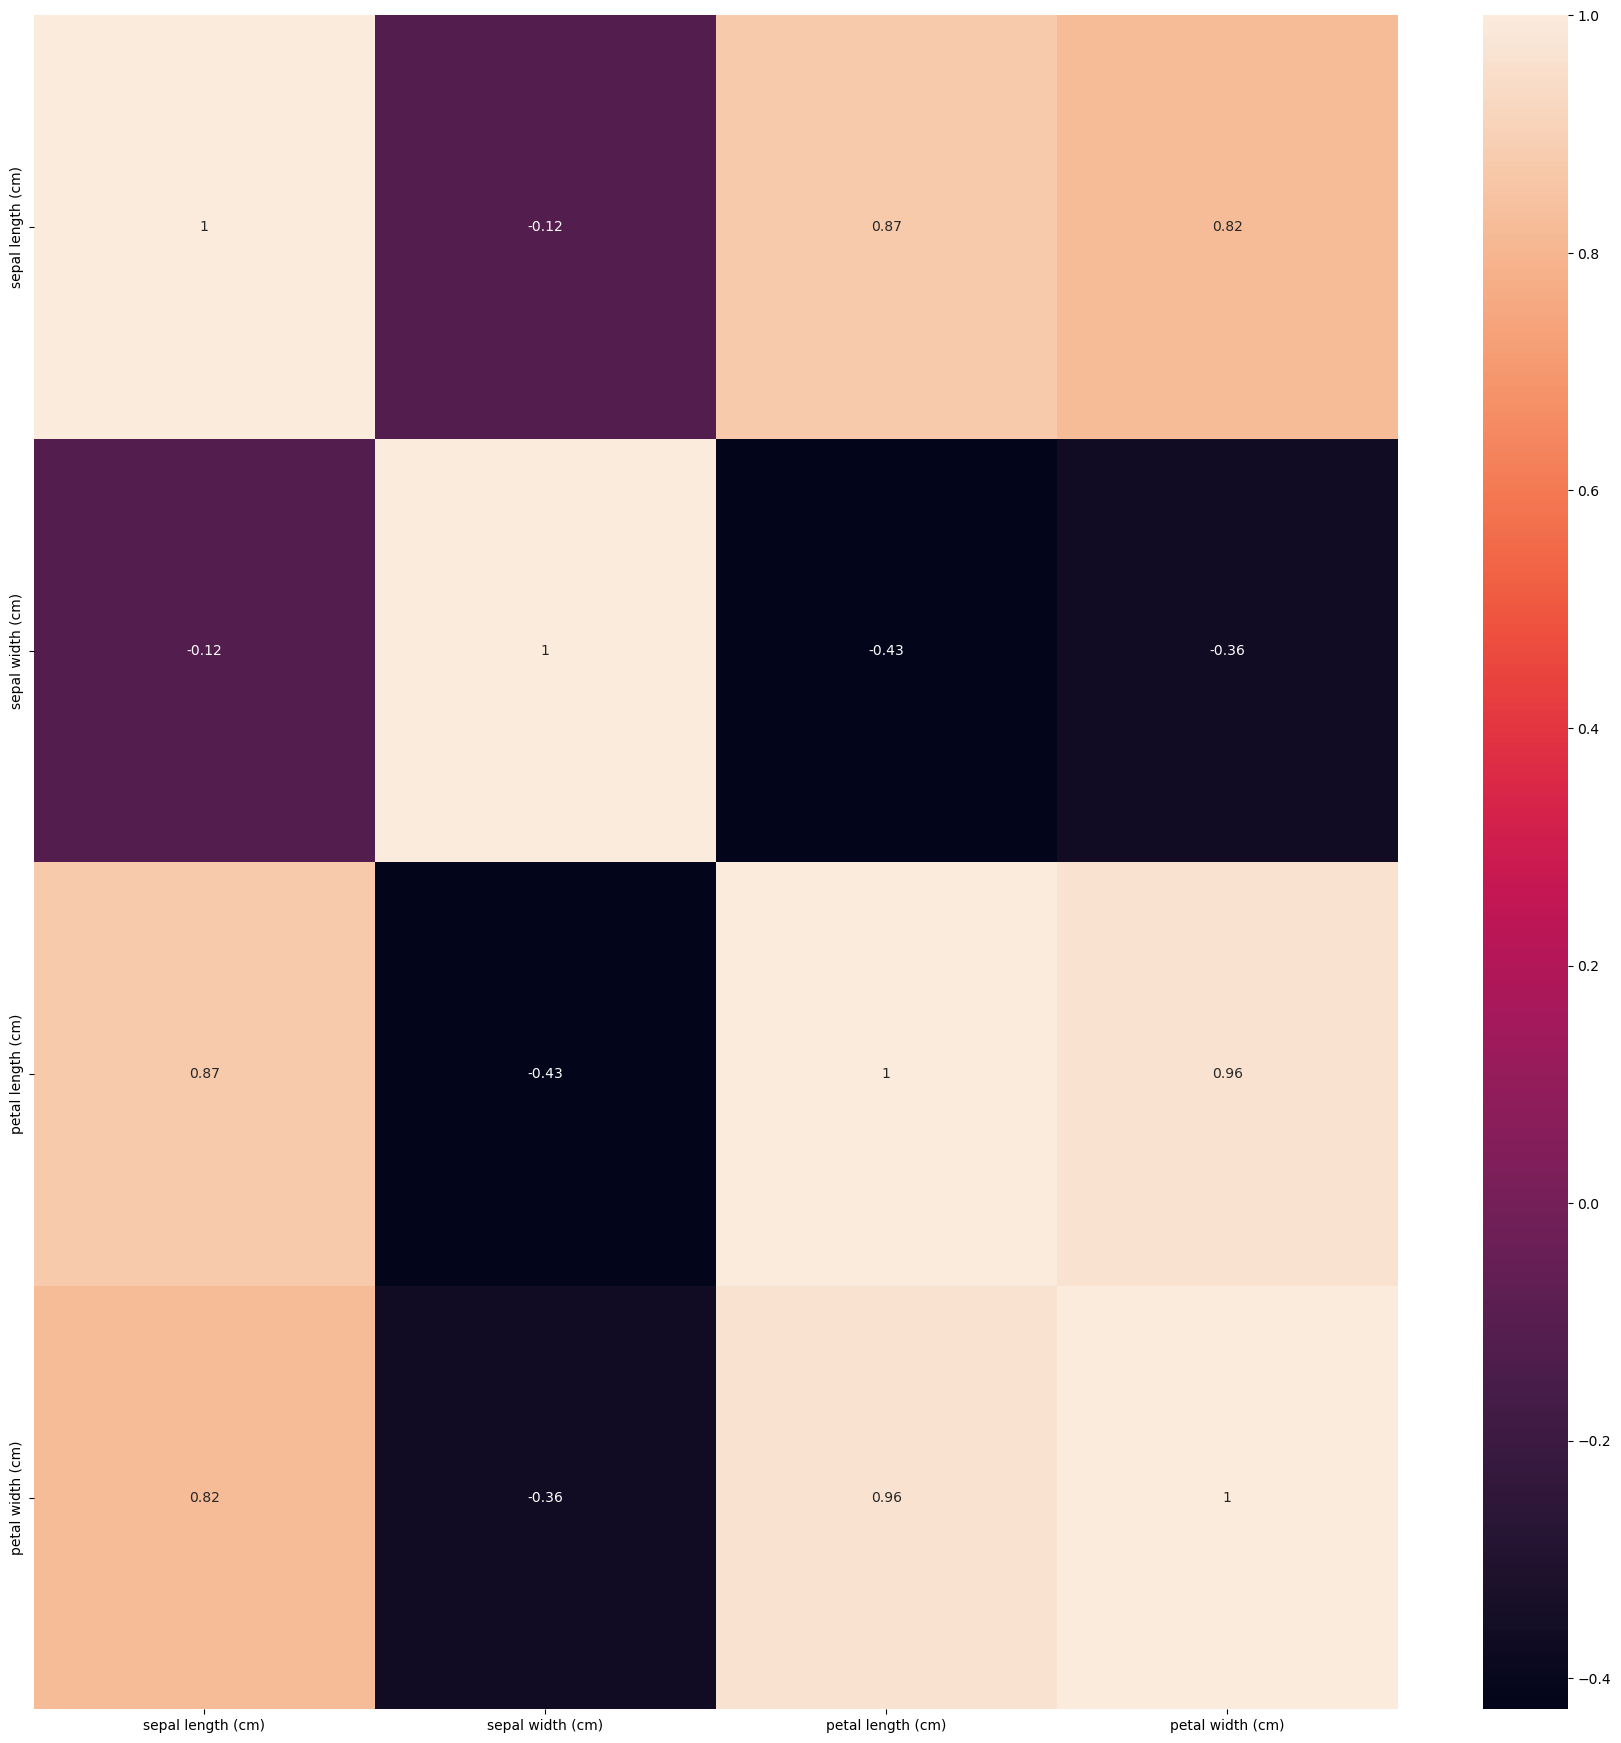

In [23]:
plt.figure(figsize=(22, 22))
sns.heatmap(s,annot=True)
plt.show()


  File "C:\Users\Soorya\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


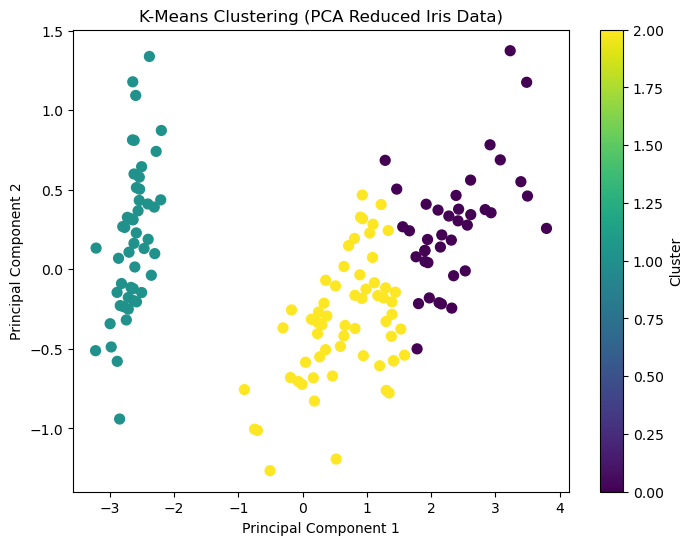

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA Reduced Iris Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

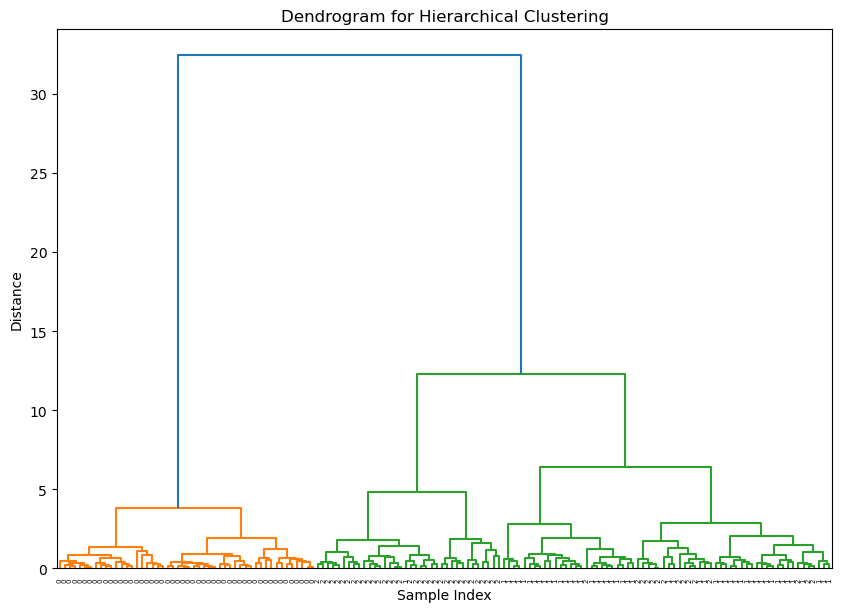

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage


linked = linkage(iris.data, 'ward')


plt.figure(figsize=(10, 7))
dendrogram(linked, labels=iris.target)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()